In [2]:
import torch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch.nn as nn

In [4]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)

In [5]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [6]:
torch.manual_seed(42)
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [7]:
e

tensor([[ 5.],
        [ 6.],
        [ 3.],
        [ 4.],
        [-1.],
        [-2.],
        [-6.],
        [ 3.],
        [-8.],
        [-4.],
        [ 1.],
        [-3.],
        [ 5.],
        [-3.],
        [-7.],
        [-5.],
        [-4.],
        [ 2.],
        [-5.],
        [-4.],
        [ 0.],
        [-2.],
        [-3.],
        [-6.],
        [-3.],
        [-4.],
        [ 2.],
        [-6.],
        [-2.],
        [ 3.],
        [-5.],
        [ 6.],
        [-7.],
        [ 6.],
        [ 5.],
        [ 0.],
        [-5.],
        [-2.],
        [-1.],
        [-3.],
        [-8.],
        [ 4.],
        [ 4.],
        [-7.],
        [ 8.],
        [ 0.],
        [ 6.],
        [ 4.],
        [-3.],
        [-6.]])

In [8]:
y = 2*X + 1 + e

In [9]:
y.shape

torch.Size([50, 1])

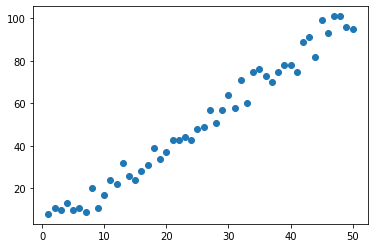

In [11]:
plt.scatter(X.numpy(), y.numpy())

In [12]:
torch.manual_seed(42)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.7645]], requires_grad=True)
Parameter containing:
tensor([0.8300], requires_grad=True)


In [14]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [39]:
torch.manual_seed(42)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.7645]], requires_grad=True)
Parameter containing:
tensor([0.8300], requires_grad=True)


In [16]:
for name, param in model.named_parameters():
    print(name,'\t', param.item())

linear.weight 	 0.7645385265350342
linear.bias 	 0.8300079107284546


In [40]:
x = torch.tensor([2.0])

model.forward(x)

tensor([2.3591], grad_fn=<AddBackward0>)

In [41]:
x1 = np.linspace(0.0, 50.0, 50)

In [42]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [43]:
w1 = 0.7645
b1 = 0.8300

y1 = w1*x1 + b1

In [44]:
y1

array([ 0.83      ,  1.61010204,  2.39020408,  3.17030612,  3.95040816,
        4.7305102 ,  5.51061224,  6.29071429,  7.07081633,  7.85091837,
        8.63102041,  9.41112245, 10.19122449, 10.97132653, 11.75142857,
       12.53153061, 13.31163265, 14.09173469, 14.87183673, 15.65193878,
       16.43204082, 17.21214286, 17.9922449 , 18.77234694, 19.55244898,
       20.33255102, 21.11265306, 21.8927551 , 22.67285714, 23.45295918,
       24.23306122, 25.01316327, 25.79326531, 26.57336735, 27.35346939,
       28.13357143, 28.91367347, 29.69377551, 30.47387755, 31.25397959,
       32.03408163, 32.81418367, 33.59428571, 34.37438776, 35.1544898 ,
       35.93459184, 36.71469388, 37.49479592, 38.27489796, 39.055     ])

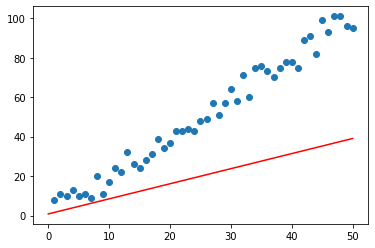

In [45]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

# Lost function (Cost function)

In [46]:
criterion = nn.MSELoss()

In [47]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [48]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1

    # Predicting on the forward pass
    y_pred = model.forward(X)

    # Calculate our loss (error)
    loss = criterion(y_pred, y)

    # Record that error
    losses.append(loss.item())

    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

epoch 1 loss: 1284.1829833984375 weight: 0.7645385265350342 bias: 0.8300079107284546
epoch 2 loss: 672.6824951171875 weight: 2.848055124282837 bias: 0.8914364576339722
epoch 3 loss: 356.987060546875 weight: 1.3510414361953735 bias: 0.8464827537536621
epoch 4 loss: 194.00506591796875 weight: 2.4266929626464844 bias: 0.8779667019844055
epoch 5 loss: 109.86296844482422 weight: 1.6538447141647339 bias: 0.8545294404029846
epoch 6 loss: 66.42324829101562 weight: 2.209172248840332 bias: 0.8705543279647827
epoch 7 loss: 43.996788024902344 weight: 1.8101853132247925 bias: 0.8582254648208618
epoch 8 loss: 32.418701171875 weight: 2.0968875885009766 bias: 0.866269588470459
epoch 9 loss: 26.441265106201172 weight: 1.8909118175506592 bias: 0.8596757650375366
epoch 10 loss: 23.355209350585938 weight: 2.0389328002929688 bias: 0.8635998964309692
epoch 11 loss: 21.761882781982422 weight: 1.9326014518737793 bias: 0.8599671125411987
epoch 12 loss: 20.939186096191406 weight: 2.009026288986206 bias: 0.86176

Text(0.5, 0, 'Epoch')

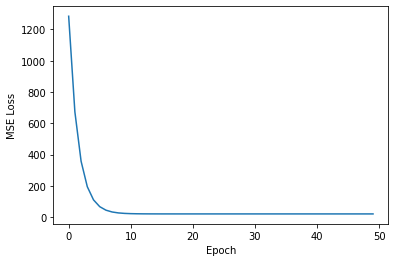

In [49]:
plt.plot(range(epochs), losses)
plt.ylabel("MSE Loss")
plt.xlabel("Epoch")

In [50]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [51]:
predicted_y

array([ 0.84255052,  2.86053145,  4.87851239,  6.89649332,  8.91447426,
       10.93245519, 12.95043613, 14.96841707, 16.986398  , 19.00437894,
       21.02235987, 23.04034081, 25.05832174, 27.07630268, 29.09428361,
       31.11226455, 33.13024549, 35.14822642, 37.16620736, 39.18418829,
       41.20216923, 43.22015016, 45.2381311 , 47.25611204, 49.27409297,
       51.29207391, 53.31005484, 55.32803578, 57.34601671, 59.36399765,
       61.38197858, 63.39995952, 65.41794046, 67.43592139, 69.45390233,
       71.47188326, 73.4898642 , 75.50784513, 77.52582607, 79.54380701,
       81.56178794, 83.57976888, 85.59774981, 87.61573075, 89.63371168,
       91.65169262, 93.66967355, 95.68765449, 97.70563543, 99.72361636])

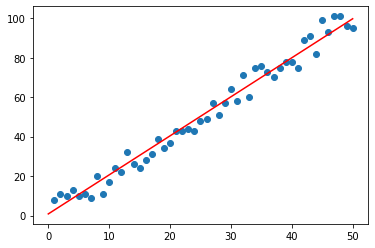

In [52]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')